# Importing the Dataset

In [382]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score

In [383]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [384]:
from keras.models import Sequential
from keras.layers import Dense

In [385]:
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [386]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [387]:
df=pd.read_csv('/content/drive/MyDrive/ML Lab Files/Project/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Pre-Processing And Visualisations

## Data Cleaning

In [389]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [390]:
df=df.fillna(df['bmi'].mean())

In [391]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [392]:
np.unique(df["work_type"])

array(['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children'],
      dtype=object)

In [393]:
df=df.iloc[:,1:]
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


## Plots and Visualisations

### Count plots




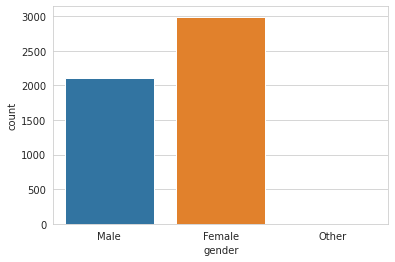

In [394]:
sns.countplot(x = 'gender',data=df)
plt.show()

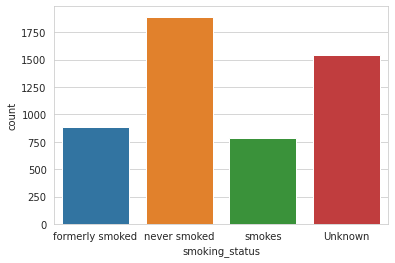

In [395]:
sns.countplot(x ='smoking_status', data = df)
plt.show()

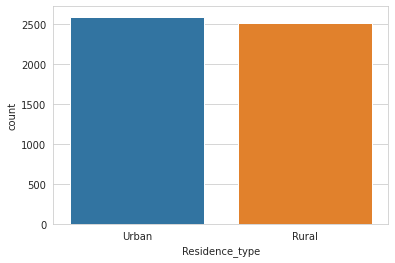

In [396]:
sns.countplot(x ='Residence_type', data = df)
plt.show()

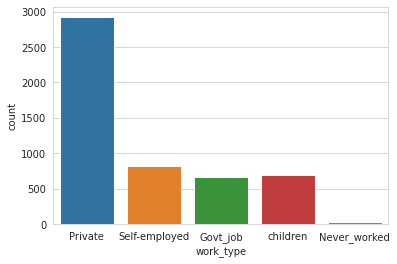

In [397]:
sns.countplot(x ='work_type', data = df)
plt.show()

### Distribution of Categorial Featues


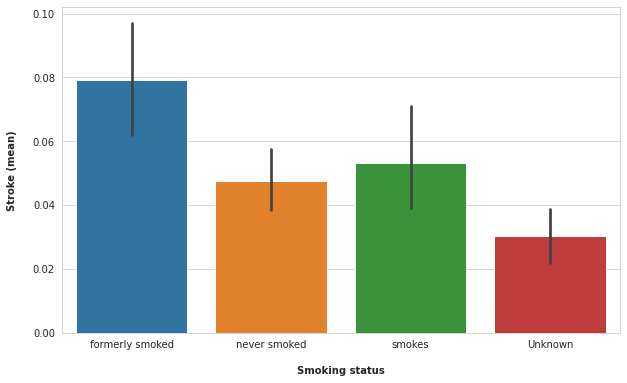

In [398]:
plt.figure(figsize=(10,6))
sns.barplot(x="smoking_status", y="stroke", data=df)
plt.xlabel("\nSmoking status", fontweight="bold")
plt.ylabel("Stroke (mean)\n", fontweight="bold")
plt.show()

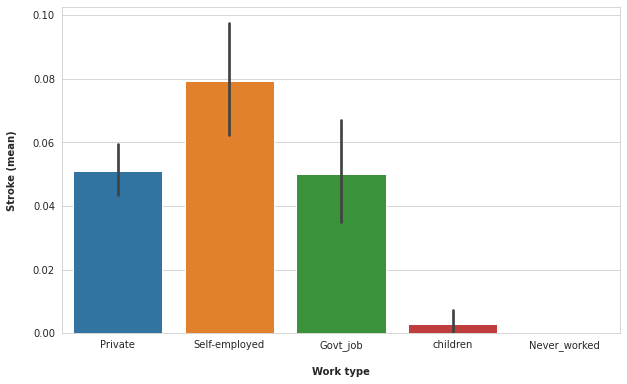

In [399]:
plt.figure(figsize=(10,6))
sns.barplot(x="work_type", y="stroke", data=df)
plt.xlabel("\nWork type", fontweight="bold")
plt.ylabel("Stroke (mean)\n", fontweight="bold")
plt.show()

### Distribution of Categorical Featuers With Stroke

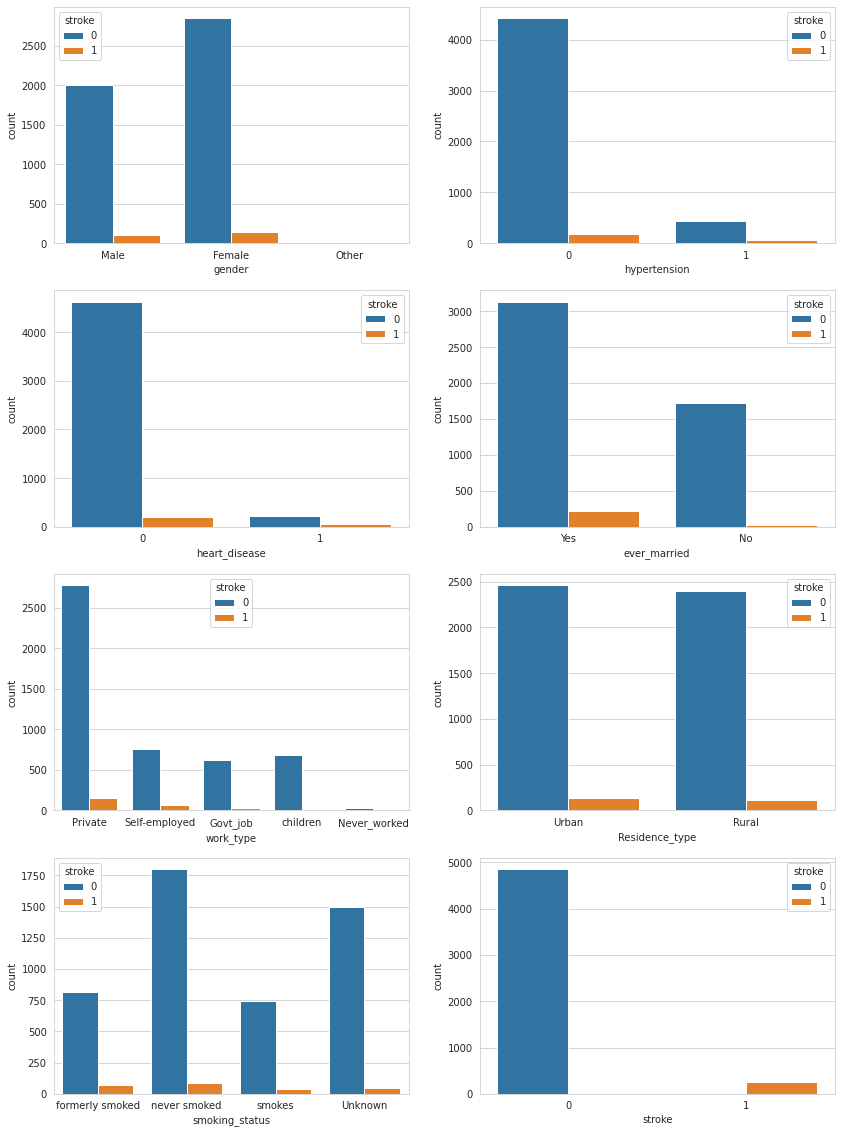

In [400]:
some_attri=['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status', 'stroke']
fig, axis = plt.subplots(4, 2, figsize=(14,20))
axis = axis.flatten()
for i, col_name in enumerate(some_attri):
    sns.countplot(x=col_name, data=df, ax=axis[i], hue =df['stroke'])
plt.show()

### Denstity Distribution of Continous Features With Stroke

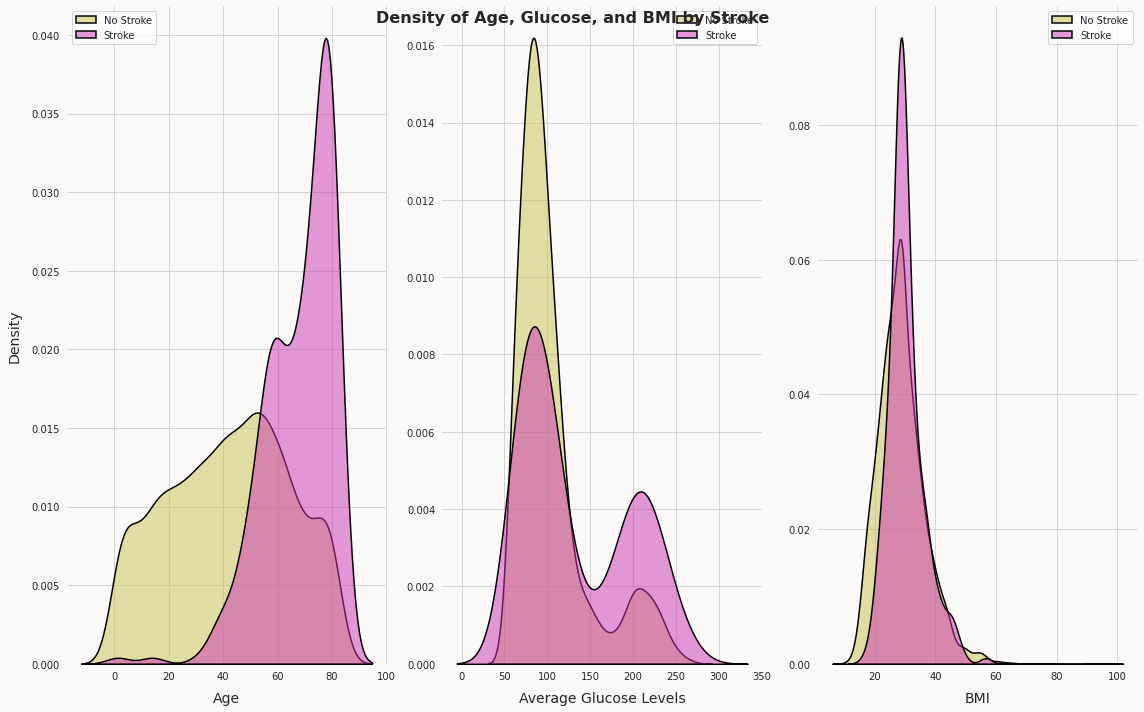

In [401]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (16,10))
fig.patch.set_facecolor('#faf9f7')

for i in (ax1, ax2, ax3):
    i.set_facecolor('#faf9f7')

sns.kdeplot(
    df['age'][df['stroke'] == 0],
    ax = ax1,
    color = "#c8c14f",
    shade = True,
    alpha = 0.5,
    linewidth = 1.5,
    ec = 'black'
)
sns.kdeplot(
    df['age'][df['stroke'] == 1],
    ax = ax1,
    color = "#cd34b5",
    shade = True,
    alpha = 0.5,
    linewidth = 1.5,
    ec = 'black'
)
ax1.legend(['No Stroke', 'Stroke'], loc = 'upper left')
ax1.set_xlabel('Age', fontsize = 14, labelpad = 10)
ax1.set_ylabel('Density', fontsize = 14, labelpad = 10)

sns.kdeplot(
    df['avg_glucose_level'][df['stroke'] == 0],
    ax = ax2,
    color = "#c8c14f",
    shade = True,
    alpha = 0.5,
    linewidth = 1.5,
    ec = 'black'
    )

sns.kdeplot(
    df['avg_glucose_level'][df['stroke'] == 1],
    ax = ax2,
    color = "#cd34b5",
    shade = True,
    alpha = 0.5,
    linewidth = 1.5,
    ec = 'black'
)

ax2.legend(['No Stroke', 'Stroke'])
ax2.set_xlabel('Average Glucose Levels', fontsize = 14, labelpad = 10)
ax2.set_ylabel('')

sns.kdeplot(
    df['bmi'][df['stroke'] == 0],
    ax = ax3,
    color = "#c8c14f",
    shade = True,
    alpha = 0.5,
    linewidth = 1.5,
    ec = 'black'
)

sns.kdeplot(
    df['bmi'][df['stroke'] == 1],
    ax = ax3,
    color = "#cd34b5",
    shade = True,
    alpha = 0.5,
    linewidth = 1.5,
    ec = 'black'
)

ax3.legend(['No Stroke', 'Stroke'])
ax3.set_xlabel('BMI', fontsize = 14, labelpad = 10)
ax3.set_ylabel('')

plt.suptitle('Density of Age, Glucose, and BMI by Stroke', fontsize = 16, fontweight = 'bold')
for i in (ax1, ax2, ax3):
    for j in ['top', 'left', 'bottom', 'right']:
        i.spines[j].set_visible(False)

fig.tight_layout()


### Distribution of Stroke

Text(0.5, 1.0, 'Percentage of Strokes')

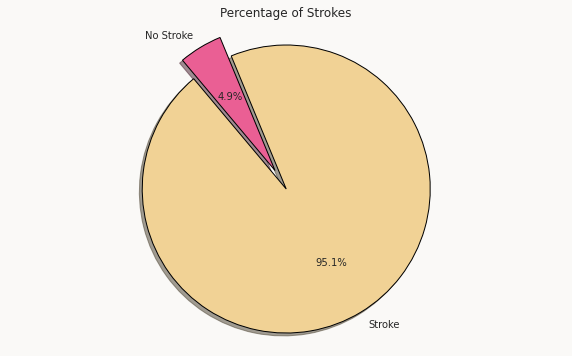

In [402]:
fig, ax = plt.subplots(figsize=(10,6))
fig.patch.set_facecolor('#faf9f7')
ax.set_facecolor('#faf9f7')

labels = ['Stroke', 'No Stroke']
colors = ["#f1d295", "#ea5f94"]
sizes = df['stroke'].value_counts()

plt.pie(sizes, explode = [0, 0.15], labels = labels, colors = colors,
           autopct = '%1.1f%%', shadow = True, startangle = 130,
           wedgeprops = {'ec': 'black'}, textprops = {'fontweight': 'medium'}
)
plt.axis('equal')
plt.title('Percentage of Strokes')

## Encoding of Categorical Features 

In [403]:
labelencoder=LabelEncoder()
for i in df.columns:
  if df.dtypes[i]!=int and df.dtypes[i]!=float:
    df[i]=labelencoder.fit_transform(df[i])

df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


## Correlation Between Features

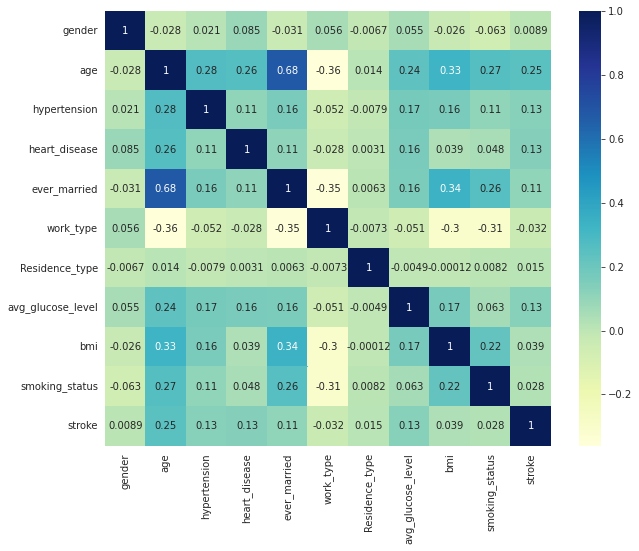

In [404]:
plt.subplots(figsize=(10,8))
sns.heatmap(data=df.corr(),annot=True, cmap = "YlGnBu")
plt.show()

## OverSampling

In [405]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values

In [406]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler()
X_os,Y_os = oversampler.fit_resample(X,Y)

In [407]:
np.unique(Y,return_counts=True)

(array([0, 1]), array([4861,  249]))

In [408]:
acc=[]
f1=[]
precision=[]
recall=[]
roc_auc=[]

## Train Test Split

In [409]:
x_train,x_test,y_train,y_test=train_test_split(X_os,Y_os,test_size=0.3,stratify=Y_os)

# Models

## Decision Tree Classifier

In [ ]:
model1 = DecisionTreeClassifier()

In [ ]:
model1.fit(x_train,y_train)
y_pred1 = model1.predict(x_test)

acc1 = accuracy_score(y_test, y_pred1)
f1_1 = f1_score(y_test, y_pred1)
pre1 = precision_score(y_test, y_pred1)
rec1 = recall_score(y_test, y_pred1)
roc1 = roc_auc_score(y_test, y_pred1)

print("accuracy_score of Model-1 =", acc1)
print("f1_score of Model-1 =", f1_1)
print("precision_score of Model-1 =", pre1)
print("recall_score of Model-1 =", rec1)
print("roc_auc score of Model-1 =", roc1)

accuracy_score of Model-1 = 0.972231744943435
f1_score of Model-1 = 0.9729909969989996
precision_score of Model-1 = 0.9474025974025974
recall_score of Model-1 = 1.0
roc_auc score of Model-1 = 0.9722222222222222


## Random Forest Classifier

In [ ]:
model2 = RandomForestClassifier(random_state=42)

In [ ]:
model2.fit(x_train,y_train)
y_pred2 = model2.predict(x_test)

acc2 = accuracy_score(y_test, y_pred2)
f1_2 = f1_score(y_test, y_pred2)
pre2 = precision_score(y_test, y_pred2)
rec2 = recall_score(y_test, y_pred2)
roc2 = roc_auc_score(y_test, y_pred2)

print("accuracy_score of Model-2 =", acc2)
print("f1_score of Model-2 =", f1_2)
print("precision_score of Model-2 =", pre2)
print("recall_score of Model-2 =", rec2)
print("roc_auc score of Model-2 =", roc2)

accuracy_score of Model-2 = 0.990743914981145
f1_score of Model-2 = 0.9908319185059423
precision_score of Model-2 = 0.9818304172274562
recall_score of Model-2 = 1.0
roc_auc score of Model-2 = 0.9907407407407408


## XGB Classifier




In [ ]:
model3 = XGBClassifier()

In [ ]:
model3.fit(x_train,y_train)
y_pred3 = model3.predict(x_test)

acc3 = accuracy_score(y_test, y_pred3)
f1_3 = f1_score(y_test, y_pred3)
pre3 = precision_score(y_test, y_pred3)
rec3 = recall_score(y_test, y_pred3)
roc3 = roc_auc_score(y_test, y_pred3)

print("accuracy_score of Model-3=", acc3)
print("f1_score of Model-3=", f1_3)
print("precision_score of Model-3=", pre3)
print("recall_score of Model-3=", rec3)
print("roc_auc score of Model-3=", roc3)

accuracy_score of Model-3= 0.8460747343160782
f1_score of Model-3= 0.858404288867865
precision_score of Model-3= 0.7949766355140186
recall_score of Model-3= 0.9328307059629883
roc_auc score of Model-3= 0.8460449826111238


## LGBM Classifier

In [ ]:
model4 = LGBMClassifier()

In [ ]:
model4.fit(x_train,y_train)
y_pred4 = model4.predict(x_test)

acc4 = accuracy_score(y_test, y_pred4)
f1_4 = f1_score(y_test, y_pred4)
pre4 = precision_score(y_test, y_pred4)
rec4 = recall_score(y_test, y_pred4)
roc4 = roc_auc_score(y_test, y_pred4)

print("accuracy_score of Model-4=", acc4)
print("f1_score of Model-4=", f1_4)
print("precision_score of Model-4=", pre4)
print("recall_score of Model-4=", rec4)
print("roc_auc score of Model-4=", roc4)

accuracy_score of Model-4= 0.96297565992458
f1_score of Model-4= 0.9643093192333113
precision_score of Model-4= 0.9310784939374601
recall_score of Model-4= 1.0
roc_auc score of Model-4= 0.962962962962963


## Logistic Regression

In [ ]:
model5 = LogisticRegression()

In [ ]:
model5.fit(x_train,y_train)
y_pred5 = model5.predict(x_test)

acc5 = accuracy_score(y_test, y_pred5)
f1_5 = f1_score(y_test, y_pred5)
pre5 = precision_score(y_test, y_pred5)
rec5 = recall_score(y_test, y_pred5)
roc5 = roc_auc_score(y_test, y_pred5)

print("accuracy_score of Model-5=", acc5)
print("f1_score of Model-5=", f1_5)
print("precision_score of Model-5=", pre5)
print("recall_score of Model-5=", rec5)
print("roc_auc score of Model-5=", roc5)

accuracy_score of Model-5= 0.7655125128556737
f1_score of Model-5= 0.774108322324967
precision_score of Model-5= 0.7469725940089229
recall_score of Model-5= 0.8032899246058944
roc_auc score of Model-5= 0.765499557639024


## SVC Classifier

In [ ]:
model6 = SVC(kernel = 'rbf')

In [ ]:
model6.fit(x_train,y_train)
y_pred6 = model6.predict(x_test)

acc6 = accuracy_score(y_test, y_pred6)
f1_6 = f1_score(y_test, y_pred6)
pre6 = precision_score(y_test, y_pred6)
rec6 = recall_score(y_test, y_pred6)
roc6 = roc_auc_score(y_test, y_pred6)

print("accuracy_score of Model-6=", acc6)
print("f1_score of Model-6=", f1_6)
print("precision_score of Model-6=", pre6)
print("recall_score of Model-6=", rec6)
print("roc_auc score of Model-6=", roc6)

accuracy_score of Model-6= 0.7548851559821734
f1_score of Model-6= 0.7679324894514767
precision_score of Model-6= 0.7293464858199753
recall_score of Model-6= 0.8108293351610693
roc_auc score of Model-6= 0.7548659707355414


## Deep Neural Networks

In [438]:
model7 = Sequential()

model7.add(Dense(32, input_dim = x_train.shape[1], activation="relu"))
model7.add(Dense(64, activation="relu"))
model7.add(Dense(128,activation="relu"))
model7.add(Dense(2, activation="softmax"))

model7.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model7.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_109 (Dense)           (None, 32)                352       
                                                                 
 dense_110 (Dense)           (None, 64)                2112      
                                                                 
 dense_111 (Dense)           (None, 128)               8320      
                                                                 
 dense_112 (Dense)           (None, 2)                 258       
                                                                 
Total params: 11,042
Trainable params: 11,042
Non-trainable params: 0
_________________________________________________________________


In [439]:
history = model7.fit(x_train,y_train, epochs=300, batch_size=32)

Epoch 1/300
213/213 [==============================] - 1s 2ms/step - loss: 0.6002 - accuracy: 0.7105
Epoch 2/300
213/213 [==============================] - 0s 2ms/step - loss: 0.5525 - accuracy: 0.7327
Epoch 3/300
213/213 [==============================] - 0s 2ms/step - loss: 0.5394 - accuracy: 0.7356
Epoch 4/300
213/213 [==============================] - 0s 2ms/step - loss: 0.5152 - accuracy: 0.7478
Epoch 5/300
213/213 [==============================] - 0s 2ms/step - loss: 0.5309 - accuracy: 0.7425
Epoch 6/300
213/213 [==============================] - 0s 2ms/step - loss: 0.5096 - accuracy: 0.7484
Epoch 7/300
213/213 [==============================] - 0s 2ms/step - loss: 0.5067 - accuracy: 0.7494
Epoch 8/300
213/213 [==============================] - 0s 2ms/step - loss: 0.5002 - accuracy: 0.7574
Epoch 9/300
213/213 [==============================] - 0s 2ms/step - loss: 0.5029 - accuracy: 0.7591
Epoch 10/300
213/213 [==============================] - 0s 2ms/step - loss: 0.4884 - accura

In [440]:
y_pred7 = model7.predict(x_test)

In [441]:
y_pred7 = [np.argmax(y_pred7[i]) for i in range(len(y_pred7))]

In [442]:
y_pred7 = np.array(y_pred7)

In [443]:
acc7 = accuracy_score(y_test, y_pred7)
f1_7 = f1_score(y_test, y_pred7)
pre7 = precision_score(y_test, y_pred7)
rec7 = recall_score(y_test, y_pred7)
roc7 = roc_auc_score(y_test, y_pred7)

print("accuracy_score of Model-7=", acc7)
print("f1_score of Model-7=", f1_7)
print("precision_score of Model-7=", pre7)
print("recall_score of Model-7=", rec7)
print("roc_auc score of Model-7=", roc7)

accuracy_score of Model-7= 0.9688035653068221
f1_score of Model-7= 0.9697372796807449
precision_score of Model-7= 0.9412524209167205
recall_score of Model-7= 1.0
roc_auc score of Model-7= 0.9688142563399589


### Visualisations

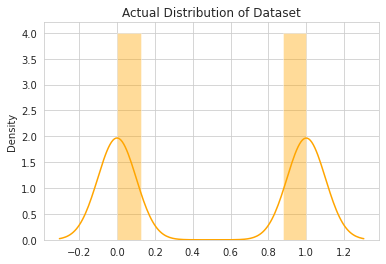

In [444]:
sns.set_style('whitegrid')
sns.distplot(y_test, color = 'orange')
plt.title('Actual Distribution of Dataset')
plt.show()

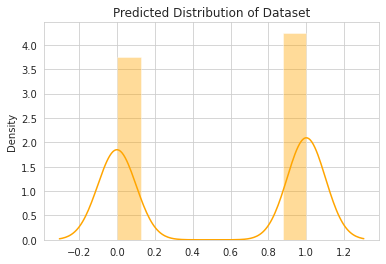

In [445]:
sns.set_style('whitegrid')
sns.distplot(y_pred7, color = 'orange')
plt.title('Predicted Distribution of Dataset')
plt.show()

In [446]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

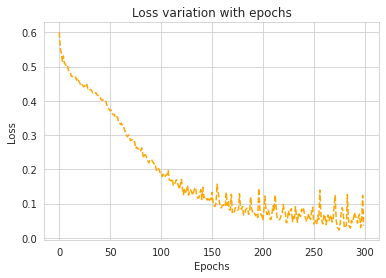

In [447]:
plt.plot(hist['loss'], color = 'orange', linestyle = 'dashed')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss variation with epochs')
plt.show()

# Hyper-Parameter Tuning(Using GridSearchCV)

## Decision Tree Classifier(With GridSearchCV)

In [ ]:
model8 = DecisionTreeClassifier()

params = {"max_depth" : [3,5,7,9,11,13,15,17,19,21,23,25,27,29],
          "min_samples_leaf":[1,3,4,5,6,7,8,9],
          "max_leaf_nodes":[None,10,20,30,40,50,60,70] }

clf = GridSearchCV(estimator=model8, 
                   param_grid=params,
                   scoring='accuracy', 
                   verbose=2, cv = 2)

clf.fit(x_train, y_train)

print("Best parameters:", clf.best_params_)
print("Highest Accuracy: ", (-1)*(-clf.best_score_))

Fitting 2 folds for each of 896 candidates, totalling 1792 fits
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=1; total time=   0.0s
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=1; total time=   0.0s
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=3; total time=   0.0s
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=3; total time=   0.0s
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=4; total time=   0.0s
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=4; total time=   0.0s
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=5; total time=   0.0s
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=5; total time=   0.0s
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=6; total time=   0.0s
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=6; total time=   0.0s
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=7; total time=   0.0s
[CV] END max_depth=3, max_leaf_nod

In [ ]:
model8 = DecisionTreeClassifier(max_depth = 21, max_leaf_nodes = None, min_samples_leaf = 1)

In [ ]:
model8.fit(x_train,y_train)
y_pred8 = model8.predict(x_test)

acc8 = accuracy_score(y_test, y_pred8)
f1_8 = f1_score(y_test, y_pred8)
pre8 = precision_score(y_test, y_pred8)
rec8 = recall_score(y_test, y_pred8)
roc8 = roc_auc_score(y_test, y_pred8)

print("accuracy_score of Model-8 =", acc8)
print("f1_score of Model-8 =", f1_8)
print("precision_score of Model-8 =", pre8)
print("recall_score of Model-8 =", rec8)
print("roc_auc score of Model-8 =", roc8)

accuracy_score of Model-8 = 0.9715461090161125
f1_score of Model-8 = 0.9723425524825058
precision_score of Model-8 = 0.9461738002594033
recall_score of Model-8 = 1.0
roc_auc score of Model-8 = 0.9715363511659808


## Random Forest Classifier(With GridSearchCV)

In [ ]:
model9 = RandomForestClassifier()

params = {'max_depth': [5,9,11,13,15,17,19,21,23,25],  
          'n_estimators': [10,30,50,70,90,100,200,300],
          'max_leaf_nodes': [10,30,50,70,None]}

clf = GridSearchCV(estimator=model9, 
                   param_grid=params,
                   scoring='accuracy', 
                   verbose=2, cv = 2)

clf.fit(x_train, y_train)

print("Best parameters:", clf.best_params_)
print("Highest Accuracy: ", -1*(-clf.best_score_))

Fitting 2 folds for each of 400 candidates, totalling 800 fits
[CV] END ....max_depth=5, max_leaf_nodes=10, n_estimators=10; total time=   0.1s
[CV] END ....max_depth=5, max_leaf_nodes=10, n_estimators=10; total time=   0.1s
[CV] END ....max_depth=5, max_leaf_nodes=10, n_estimators=30; total time=   0.1s
[CV] END ....max_depth=5, max_leaf_nodes=10, n_estimators=30; total time=   0.2s
[CV] END ....max_depth=5, max_leaf_nodes=10, n_estimators=50; total time=   0.2s
[CV] END ....max_depth=5, max_leaf_nodes=10, n_estimators=50; total time=   0.2s
[CV] END ....max_depth=5, max_leaf_nodes=10, n_estimators=70; total time=   0.3s
[CV] END ....max_depth=5, max_leaf_nodes=10, n_estimators=70; total time=   0.3s
[CV] END ....max_depth=5, max_leaf_nodes=10, n_estimators=90; total time=   0.4s
[CV] END ....max_depth=5, max_leaf_nodes=10, n_estimators=90; total time=   0.4s
[CV] END ...max_depth=5, max_leaf_nodes=10, n_estimators=100; total time=   0.5s
[CV] END ...max_depth=5, max_leaf_nodes=10, n_

In [ ]:
model9 = RandomForestClassifier(max_depth = 23,  max_leaf_nodes = None, n_estimators = 70)

In [ ]:
model9.fit(x_train,y_train)
y_pred9 = model9.predict(x_test)

acc9 = accuracy_score(y_test, y_pred9)
f1_9 = f1_score(y_test, y_pred9)
pre9 = precision_score(y_test, y_pred9)
rec9 = recall_score(y_test, y_pred9)
roc9 = roc_auc_score(y_test, y_pred9)

print("accuracy_score of Model-9 =", acc9)
print("f1_score of Model-9 =", f1_9)
print("precision_score of Model-9 =", pre9)
print("recall_score of Model-9 =", rec9)
print("roc_auc score of Model-9 =", roc9)

accuracy_score of Model-9 = 0.9921151868357901
f1_score of Model-9 = 0.9921795307718463
precision_score of Model-9 = 0.9844804318488529
recall_score of Model-9 = 1.0
roc_auc score of Model-9 = 0.9921124828532236


## XGB Classifier(With GridSearchCV)

In [ ]:
model10 = XGBClassifier()

params = {'max_depth': [7,9,11,13,15,17,19,21,23,25],  
          'learning_rate': [0.1, 0.3, 0.5],
          'n_estimators': [30,50,70,90,100,200],
          'subsample': [0.3, 0.5, 0.7]}

clf = GridSearchCV(estimator=model10, 
                   param_grid=params,
                   scoring='accuracy', 
                   verbose=2, cv = 2)

clf.fit(x_train, y_train)

print("Best parameters:", clf.best_params_)
print("Highest Accuracy: ", -1*(-clf.best_score_))

Fitting 2 folds for each of 540 candidates, totalling 1080 fits
[CV] END learning_rate=0.1, max_depth=7, n_estimators=30, subsample=0.3; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=30, subsample=0.3; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=30, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=30, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=30, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=30, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.3; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.3; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.5; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.5; total time=   0.3s
[CV] END learnin

In [ ]:
model10 = XGBClassifier(max_depth = 25, learning_rate = 0.3, n_estimators = 200, subsample = 0.7)

In [ ]:
model10.fit(x_train,y_train)
y_pred10 = model10.predict(x_test)

acc10 = accuracy_score(y_test, y_pred10)
f1_10 = f1_score(y_test, y_pred10)
pre10 = precision_score(y_test, y_pred10)
rec10 = recall_score(y_test, y_pred10)
roc10 = roc_auc_score(y_test, y_pred10)

print("accuracy_score of Model-10 =", acc10)
print("f1_score of Model-10 =", f1_10)
print("precision_score of Model-10 =", pre10)
print("recall_score of Model-10 =", rec10)
print("roc_auc score of Model-10 =", roc10)

accuracy_score of Model-10 = 0.9784024682893384
f1_score of Model-10 = 0.9788661522978866
precision_score of Model-10 = 0.9586070959264126
recall_score of Model-10 = 1.0
roc_auc score of Model-10 = 0.9783950617283951


## LGBM Classifer(With Hyper-Parameter Tuning)

In [ ]:
model11 = LGBMClassifier()

params = {'max_depth': [5,7,9,11,13,15,17,19,21,23,25],  
          'learning_rate': [0.1, 0.3, 0.5],
          'n_estimators': [10,30,50,70,90,100,150,200],
          'subsample': [0.3, 0.5, 0.7]}

clf = GridSearchCV(estimator=model11, 
                   param_grid=params,
                   scoring='accuracy', 
                   verbose=2, cv = 2)

clf.fit(x_train, y_train)

print("Best parameters:", clf.best_params_)
print("Highest Accuracy: ", (-1)*(-clf.best_score_))

Fitting 2 folds for each of 792 candidates, totalling 1584 fits
[CV] END learning_rate=0.1, max_depth=5, n_estimators=10, subsample=0.3; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=10, subsample=0.3; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=10, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=10, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=10, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=10, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=30, subsample=0.3; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=30, subsample=0.3; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=30, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=30, subsample=0.5; total time=   0.1s
[CV] END learnin

In [ ]:
model11 = LGBMClassifier(max_depth = 11, learning_rate = 0.5, n_estimators = 150, subsample = 0.3)

In [ ]:
model11.fit(x_train,y_train)
y_pred11 = model11.predict(x_test)

acc11 = accuracy_score(y_test, y_pred11)
f1_11 = f1_score(y_test, y_pred11)
pre11 = precision_score(y_test, y_pred11)
rec11 = recall_score(y_test, y_pred11)
roc11 = roc_auc_score(y_test, y_pred11)

print("accuracy_score of Model-11 =", acc11)
print("f1_score of Model-11 =", f1_11)
print("precision_score of Model-11 =", pre11)
print("recall_score of Model-11 =", rec11)
print("roc_auc score of Model-11 =", roc11)

accuracy_score of Model-11 = 0.984916009598903
f1_score of Model-11 = 0.9851451721809588
precision_score of Model-11 = 0.9707252162341983
recall_score of Model-11 = 1.0
roc_auc score of Model-11 = 0.9849108367626885


## Logistic Regression(With GridSearchCV)

In [ ]:
model12 = LogisticRegression()

params = {'penalty' : ['l1','l2'], 
          'C'       : np.logspace(-3,3,7),
          'solver'  : ['newton-cg', 'lbfgs', 'liblinear']}

clf = GridSearchCV(estimator=model12, 
                   param_grid=params,
                   scoring='accuracy', 
                   verbose=2, cv = 2)

clf.fit(x_train, y_train)

print("Best parameters:", clf.best_params_)
print("Highest Accuracy: ", (-1)*(-clf.best_score_))

Fitting 2 folds for each of 42 candidates, totalling 84 fits
[CV] END ..............C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ..............C=0.001, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ..............C=0.001, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ..................C=0.001, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END ..................C=0.001, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solv

In [ ]:
model12 = LogisticRegression(C = 0.01, penalty = 'l2', solver = 'lbfgs')

In [ ]:
model12.fit(x_train,y_train)
y_pred12 = model12.predict(x_test)

acc12 = accuracy_score(y_test, y_pred12)
f1_12 = f1_score(y_test, y_pred12)
pre12 = precision_score(y_test, y_pred12)
rec12 = recall_score(y_test, y_pred12)
roc12 = roc_auc_score(y_test, y_pred12)

print("accuracy_score of Model-12 =", acc12)
print("f1_score of Model-12 =", f1_12)
print("precision_score of Model-12 =", pre12)
print("recall_score of Model-12 =", rec12)
print("roc_auc score of Model-12 =", roc12)

accuracy_score of Model-12 = 0.7761398697291738
f1_score of Model-12 = 0.7863918874713771
precision_score of Model-12 = 0.7521902377972466
recall_score of Model-12 = 0.8238519533927348
roc_auc score of Model-12 = 0.776123507560565


## SVC(With GridSearchCV)

In [ ]:
model13 = SVC()

params = {'C': [0.1, 1, 10, 100],
          'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
          'kernel': ['rbf','sigmoid']}
 
clf = GridSearchCV(estimator=model13, 
                   param_grid=params,
                   scoring='accuracy', 
                   verbose=2, cv = 2)

clf.fit(x_train, y_train)

print("Best parameters:", clf.best_params_)
print("Highest Accuracy: ", -1*(-clf.best_score_))

Fitting 2 folds for each of 40 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.3s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   1.2s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   1.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   2.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   2.4s
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=   0.9s
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=   1.1s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   1.5s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   3.3s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   1.4s
[CV] END ..................C=0.1, gamma=0.01, ke

In [ ]:
model13 = SVC(C = 1, gamma = 1, kernel = 'rbf')

In [ ]:
model13.fit(x_train,y_train)
y_pred13 = model13.predict(x_test)

acc13 = accuracy_score(y_test, y_pred13)
f1_13 = f1_score(y_test, y_pred13)
pre13 = precision_score(y_test, y_pred13)
rec13 = recall_score(y_test, y_pred13)
roc13 = roc_auc_score(y_test, y_pred13)

print("accuracy_score of Model-13 =", acc13)
print("f1_score of Model-13 =", f1_13)
print("precision_score of Model-13 =", pre13)
print("recall_score of Model-13 =", rec13)
print("roc_auc score of Model-13 =", roc13)

accuracy_score of Model-13 = 1.0
f1_score of Model-13 = 1.0
precision_score of Model-13 = 1.0
recall_score of Model-13 = 1.0
roc_auc score of Model-13 = 1.0


# Summary of Models

We have trained the following models:


1.   Decision Tree Classifier
2.   Random Forest Classifier

1.   XGB Classifier
2.   LGBM Classifier

1.   Logistic Regression
2.   SVC

1.   Deep Neural Networks
2.   Decision Tree Classifier(With HyperParameter Tuning)

1.   Random Forest Classifier(With HyperParameter Tuning)
2.   XGB Classifier(With HyperParameter Tuning)

1.   LGBM Classifier(With HyperParameter Tuning)
2.   Logistic Regression(With HyperParameter Tuning)

1.   SVC(With HyperParameter Tuning)



# Comparative Analysis

In [ ]:
acc_score = [acc8, acc9, acc10, acc11, acc12, acc13, acc7]
f1_score  = [f1_8, f1_9, f1_10, f1_11, f1_12, f1_13, f1_7]
pre_score = [pre8, pre9, pre10, pre11, pre12, pre13, pre7]
rec_score = [rec8, rec9, rec10, rec11, rec12, rec13, rec7]
roc_score = [roc8, roc9, roc10, roc11, roc12, roc13, roc7]
names = ['Decision Tree', 'Random Forest', 'XGB Classifier', 'LGBM Classifier', 'Logistic Regression', 'SVC', 'DNN']

## Accuracy Scores

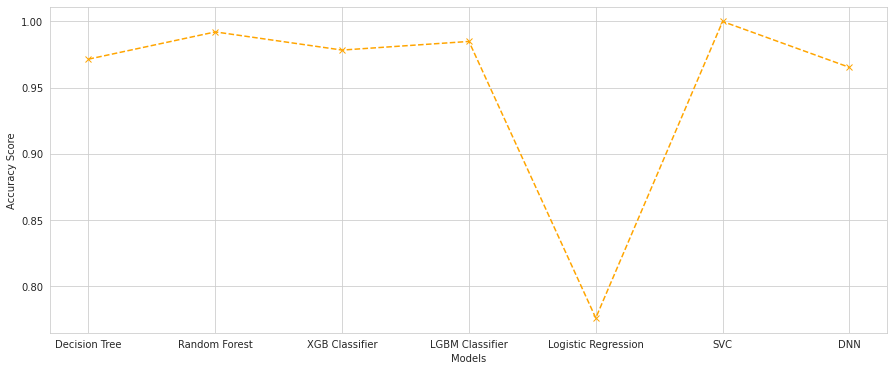

In [ ]:
plt.figure(figsize = (15,6))

plt.plot(names, acc_score, marker = 'x', color = 'orange', linestyle = 'dashed')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.show()

## F1- Score

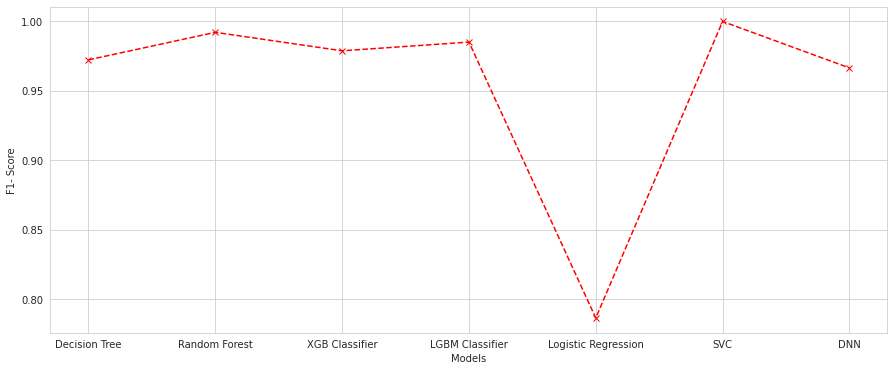

In [ ]:
plt.figure(figsize = (15,6))

plt.plot(names, f1_score, marker = 'x', color = 'red', linestyle = 'dashed')
plt.xlabel('Models')
plt.ylabel('F1- Score')
plt.show()

## Precision Score

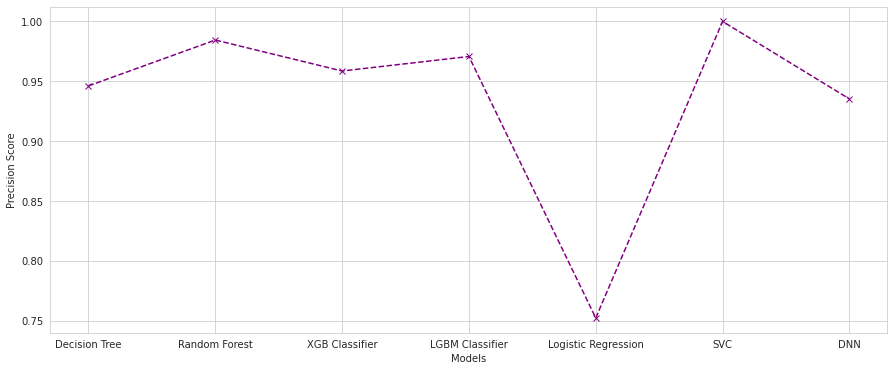

In [ ]:
plt.figure(figsize = (15,6))

plt.plot(names, pre_score, marker = 'x', color = 'purple', linestyle = 'dashed')
plt.xlabel('Models')
plt.ylabel('Precision Score')
plt.show()

## Recall Score

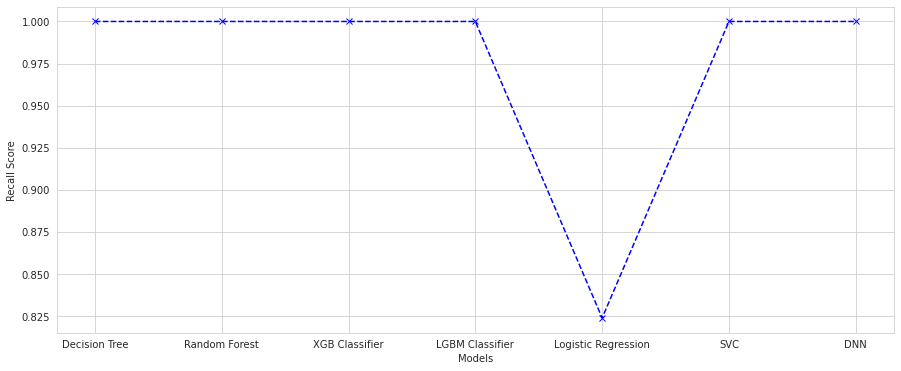

In [ ]:
plt.figure(figsize = (15,6))

plt.plot(names, rec_score, marker = 'x', color = 'blue', linestyle = 'dashed')
plt.xlabel('Models')
plt.ylabel('Recall Score')
plt.show()

## ROC AUC Score

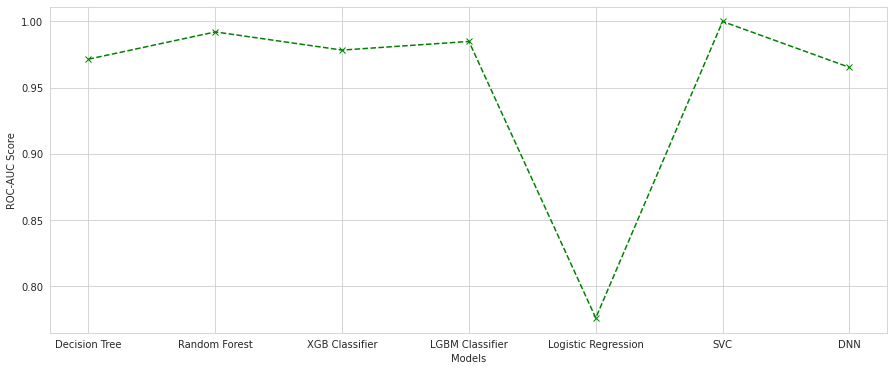

In [ ]:
plt.figure(figsize = (15,6))

plt.plot(names, roc_score, marker = 'x', color = 'green', linestyle = 'dashed')
plt.xlabel('Models')
plt.ylabel('ROC-AUC Score')
plt.show()

# Exporting the Model

In [432]:
model7.save("strokePrediction.h5")

In [433]:
!pip install tensorflowjs
!tensorflowjs_converter --input_format keras '/content/strokePrediction.h5' '/content/strokePrediction'